# Introduction: Background of the Problem

It is often important for Law Enforcement Agency to identify the crime rate and pattern in an area to identify proper strategies: enforcement, education, campaigning etc. In this study we will inventigate a cluster analysis of the Chicago Neighborhood to find out the typical crime types, frequency etc. The analysis can also help someone choosing a relatively safe neighborhood. 

# Data Source and Description

The folowing two primary data sources were used for this study.
1. Neighborhood Information was availabel from the following wiki page: (https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago)

2. Crime information was Avialble from Chicago Data Portal
 (https://data.cityofchicago.org/Public-Safety/Crimes-Map/dfnk-7re6). The data was exported in csv format and imported into the Python dataframe for analysis. The file has all crimes for an year January 5, 2019 until Janaury 4, 2020
 
 The crime report shows the following salient fields:
 1. Case #
 2. Date of Occurence
 3. Approximate Block Address.
 4.Primary DEscription of the crime (i.e. BUrglary, Battery, Theft etc.)
 5. Secondary Description of the Crime
 6. Location Description
 7. Arrest made (Y/N)?
 8.Domestic Violence (Y/N)?
 9. Latitue and
 10. Longitude
 

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install lxml

In [3]:
import bs4 as bs
import urllib.request
#read the URL and clean by BeautifulSoup class
sauce = urllib.request.urlopen ('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago').read()
soup = bs.BeautifulSoup (sauce,'lxml')
#Check the title
soup.title

<title>List of neighborhoods in Chicago - Wikipedia</title>

In [4]:
#Read the table using find function since there is only one table available
table = soup.find('table')
#Read the table rows by reading tags 'tr'
table_rows =table.find_all('tr')
#Run loops to read the table rows by reading  < td > html tags
for tr in table_rows:
    td = tr.find_all('td')
    row= [i.text for i in td]
    print (row)

[]
['Albany Park\n', 'Albany Park\n']
['Altgeld Gardens\n', 'Riverdale\n']
['Andersonville\n', 'Edgewater\n']
['Archer Heights\n', 'Archer Heights\n']
['Armour Square\n', 'Armour Square\n']
['Ashburn\n', 'Ashburn\n']
['Ashburn Estates\n', 'Ashburn\n']
['Auburn Gresham\n', 'Auburn Gresham\n']
['Avalon Park\n', 'Avalon Park\n']
['Avondale\n', 'Avondale\n']
['Avondale Gardens\n', 'Irving Park\n']
['Back of the Yards\n', 'New City\n']
['Belmont Central\n', 'Belmont Cragin\n']
['Belmont Gardens\n', 'Hermosa\n']
['Belmont Heights\n', 'Dunning\n']
['Belmont Terrace\n', 'Dunning\n']
['Beverly\n', 'Beverly\n']
['Beverly View\n', 'Ashburn\n']
['Beverly Woods\n', 'Morgan Park\n']
['Big Oaks\n', 'Norwood Park\n']
['Boystown\n', 'Lake View\n']
['Bowmanville\n', 'Lincoln Square\n']
['Brainerd\n', 'Washington Heights\n']
['Brickyard\n', 'Belmont Cragin\n']
['Bridgeport\n', 'Bridgeport\n']
['Brighton Park\n', 'Brighton Park\n']
['Bronzeville\n', 'Douglas\n']
['Bucktown\n', 'Logan Square\n']
['Budlong 

In [5]:
#create a list of lists for all rowas
listrows=[]
j=0
for tr in table_rows:
    td = tr.find_all('td')
    row= [i.text for i in td]
    # exclude the header
    if (j>0):
        listrows.append(row)
    j=j+1
#Print first 10 rows    
listrows [:10]

[['Albany Park\n', 'Albany Park\n'],
 ['Altgeld Gardens\n', 'Riverdale\n'],
 ['Andersonville\n', 'Edgewater\n'],
 ['Archer Heights\n', 'Archer Heights\n'],
 ['Armour Square\n', 'Armour Square\n'],
 ['Ashburn\n', 'Ashburn\n'],
 ['Ashburn Estates\n', 'Ashburn\n'],
 ['Auburn Gresham\n', 'Auburn Gresham\n'],
 ['Avalon Park\n', 'Avalon Park\n'],
 ['Avondale\n', 'Avondale\n']]

In [6]:
# import pandas and convert the listrows into datafrane
import pandas as pd
df = pd.DataFrame(listrows)
df.head()

,0,1
0,Albany Park\n,Albany Park\n
1,Altgeld Gardens\n,Riverdale\n
2,Andersonville\n,Edgewater\n
3,Archer Heights\n,Archer Heights\n
4,Armour Square\n,Armour Square\n


In [7]:
#Create fucntion to clean the ending new line "\n"
def cleanNeighborhood(column):
    str2 = column.replace('\n', '')
    return str2

In [8]:
#Check the function before applying to the dataframe
print(cleanNeighborhood ('Albany Park\n'))

Albany Park


In [13]:
#assign header to the dataframe
df.columns = ['Neighborhood', 'Community Areas']
df.head()

,Neighborhood,Community Areas
0,Albany Park\n,Albany Park\n
1,Altgeld Gardens\n,Riverdale\n
2,Andersonville\n,Edgewater\n
3,Archer Heights\n,Archer Heights\n
4,Armour Square\n,Armour Square\n


In [15]:
#Apply the function to the dataframe
df['Neighborhood'] = df.apply(lambda row: cleanNeighborhood(row['Neighborhood']), axis=1)
df['Community Areas'] = df.apply(lambda row: cleanNeighborhood(row['Community Areas']), axis=1)
df.head()

,Neighborhood,Community Areas
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


In [18]:
#lets apple Geopy packate to get the info for Latlong
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Albany Park, Chicago ,IL")
print(location.latitude,location.longitude)

41.9719367 -87.7161739


In [28]:
#now, lets create a function that can return the Lat-Long
def get_geo_info(Neighborhood):
    from geopy.geocoders import Nominatim

    # Create geo_locator object instance
    geo_locator = Nominatim()
    place_name = Neighborhood+" , Chicago, IL"

    # Attempt to obtain geo data for given place name
    try:
        location = geo_locator.geocode(place_name)
    except Exception:
        return 0,0
    if not location:
        return 0,0
    return location.latitude,location.longitude 

In [30]:
df[['Latitude', 'Longitude']] = df.apply(lambda row: get_geo_info(row['Neighborhood']), axis=1,result_type='expand')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [39]:
#Lets check theeighborhood that could not be assigned a latitude and longitude
df[df['Latitude']==0]

,Neighborhood,Community Areas,Latitude,Longitude
6,Ashburn Estates,Ashburn,0.0,0.0
42,Cottage Grove Heights,Pullman,0.0,0.0
95,Irving Woods,Dunning,0.0,0.0
98,Jackson Park Highlands,South Shore,0.0,0.0
110,Lakewood / Balmoral,Edgewater,0.0,0.0
112,Legends South (Robert Taylor Homes),Grand Boulevard,0.0,0.0
125,Margate Park,Uptown,0.0,0.0
167,Polish Downtown,"West Town, Logan Square",0.0,0.0
176,Ranch Triangle,Lincoln Park,0.0,0.0
182,River's Edge,North Park,0.0,0.0


In [40]:
#let's remove these records from the analysis. 
#In the ideal cases the latitude and longitude can be manualy assigned by simple location search. 
#However, they are removed to simplify the process.
df =df[df['Latitude']!=0]
df.shape

(230, 4)

Therefore, in the final dataframe there are 230 neighborhood

# Methodology

In order to analyze the crime data the following methodlogies were considered:
1. Mapping the Neighbor - Mapping the neighborhood in Chicago was done using the follium library. The mapping shows spatial distribution of the neighborhoods.
2. Crime Data Import and Data Wrangling - The crime data was downloaded as csv file and imported into a Pandas dataframe. 
3. Exploratory Analysis of Crime Data: The crime data was then considered for exploratory analysis. The followign analysis were performce:
i) Distriution of Primary Crime Types
ii) Distriution of Primary Crime Types by Arrest made
iii) Crime Distribution by Months of YEar 2019.
iv) Distribution of Crimes by Days of Week

4. Clusterign of Neighborhoods using K-means clustering

# Mapping Chicago Neighborhood

In [41]:
# Install follium for mapping
! pip install folium

In [43]:
# create map of Chicago using latitude and longitude values
import folium
address = 'Chicago, IL'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

# Importing Crime Data and Exploratory Analysis

In [45]:
import numpy as np
import pandas as pd

In [46]:
df_crime = pd.read_csv("C:/Users/Shafiul Azam/Desktop/Crimes_-_Map.csv")

In [48]:
df_crime.tail()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
256484,JC356571,07/19/2019 09:00:00 PM,031XX W HARRISON ST,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,GOVERNMENT BUILDING/PROPERTY,N,N,1134,24.0,26,1155457.0,1897193.0,41.873699,-87.704705,"(41.873699424, -87.704705156)"
256485,JC318635,06/23/2019 04:40:00 PM,005XX N CENTRAL AVE,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,N,N,1523,37.0,08B,1138943.0,1902924.0,41.889742,-87.765198,"(41.889741913, -87.765198001)"
256486,JC405144,08/23/2019 11:00:00 PM,019XX W SCHILLER ST,0810,THEFT,OVER $500,STREET,N,N,1424,1.0,06,1163350.0,1909452.0,41.907177,-87.675381,"(41.907176814, -87.675380762)"
256487,JC379670,08/05/2019 12:30:00 PM,074XX S HARVARD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,N,Y,731,6.0,08B,1175245.0,1855561.0,41.759037,-87.633299,"(41.759036773, -87.633298885)"
256488,JC316226,06/18/2019 04:00:00 PM,034XX W 71ST PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,N,N,831,17.0,05,1154774.0,1856990.0,41.763391,-87.708287,"(41.763390807, -87.708286534)"


In [61]:
df_crime.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

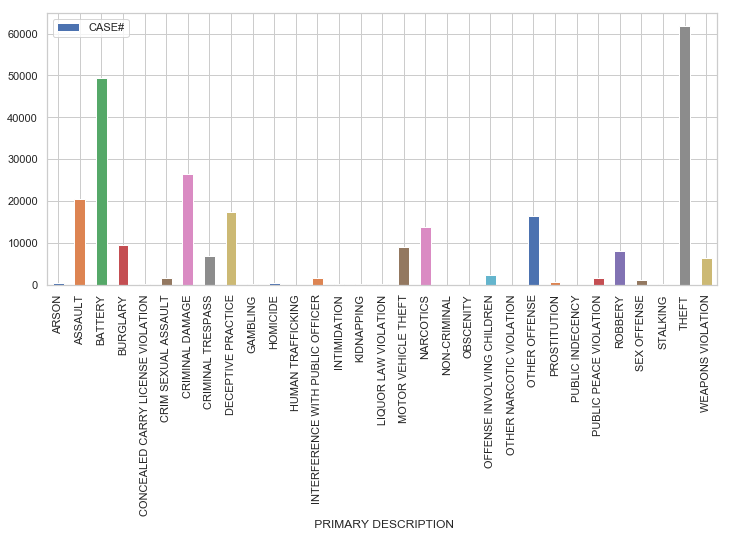

In [76]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_crime.groupby(' PRIMARY DESCRIPTION').count().plot(y='CASE#', kind='bar',figsize=(12,5))

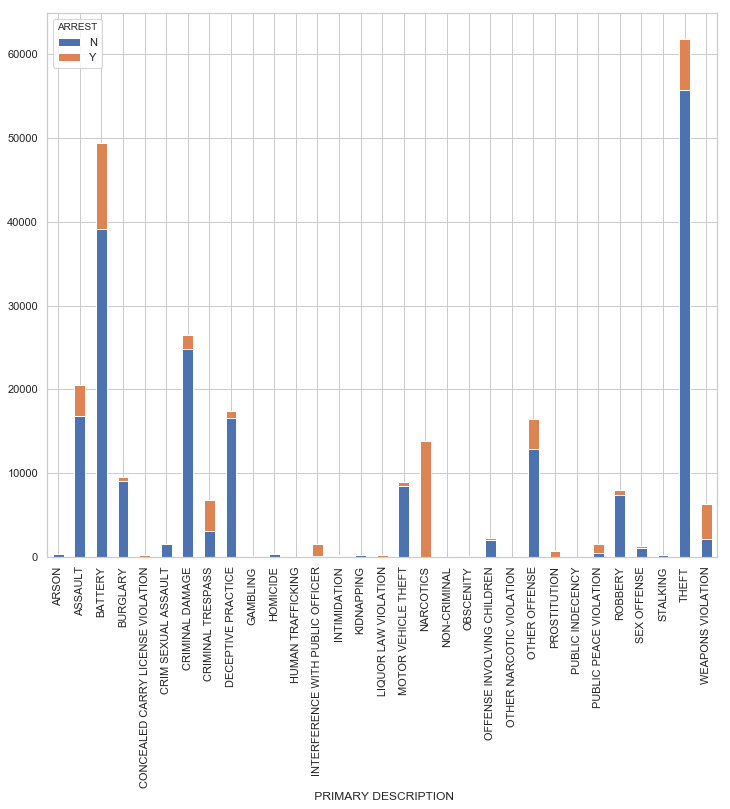

In [77]:
df_crime.groupby([' PRIMARY DESCRIPTION', 'ARREST']).count().unstack().plot(y='CASE#', kind='bar',figsize=(12,10),stacked=True)

In [83]:
df_crime['Time'] = pd.to_datetime(df_crime['DATE  OF OCCURRENCE'])

In [86]:
df_crime['Year'] = df_crime.Time.dt.year
df_crime['Month'] = df_crime.Time.dt.month
df_crime['weekday_name'] = df_crime.Time.dt.weekday_name

In [87]:
df_crime.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,...,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Time,Year,Month,weekday_name
0,JC320782,06/24/2019 06:20:00 PM,041XX S DREXEL BLVD,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),N,N,214,...,06,NaN,NaN,NaN,NaN,NaN,2019-06-24 18:20:00,2019,6,Monday
1,JC497784,11/03/2019 11:40:00 AM,032XX N CLARK ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,N,N,1924,...,06,NaN,NaN,NaN,NaN,NaN,2019-11-03 11:40:00,2019,11,Sunday
2,JC270482,05/19/2019 11:00:00 AM,018XX S WOOD ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,ATM (AUTOMATIC TELLER MACHINE),N,N,1234,...,11,NaN,NaN,NaN,NaN,NaN,2019-05-19 11:00:00,2019,5,Sunday
3,JC459410,10/04/2019 06:10:00 AM,004XX S LA SALLE ST,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,122,...,08A,NaN,NaN,NaN,NaN,NaN,2019-10-04 06:10:00,2019,10,Friday
4,JC273280,05/20/2019 03:00:00 PM,010XX N WINCHESTER AVE,0810,THEFT,OVER $500,APARTMENT,N,N,1212,...,06,NaN,NaN,NaN,NaN,NaN,2019-05-20 15:00:00,2019,5,Monday


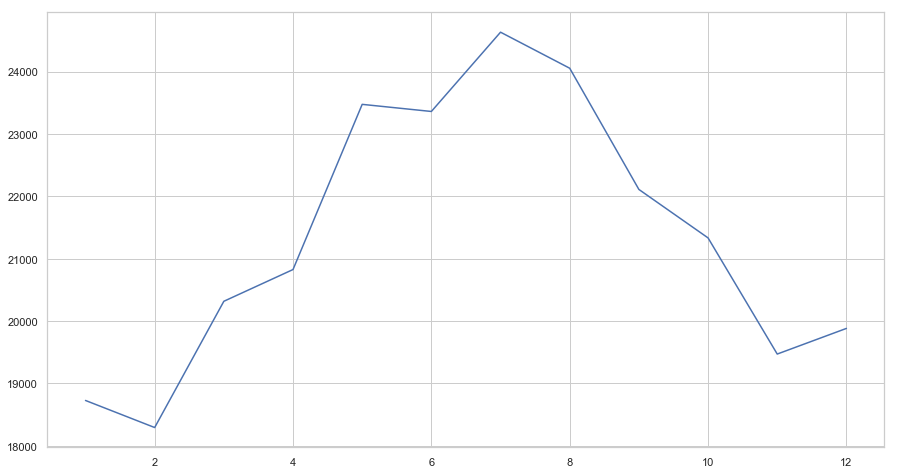

In [92]:
df_crime.Month.value_counts().sort_index().plot(figsize=(15,8))

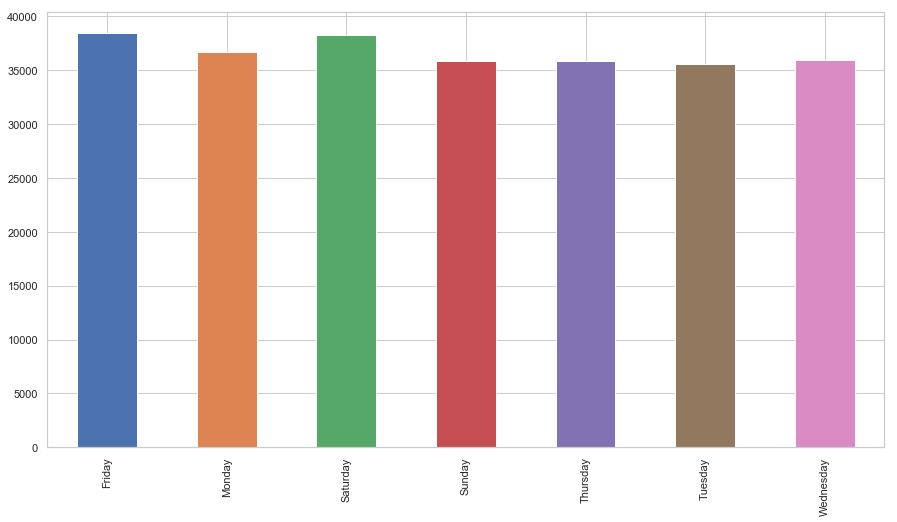

In [99]:
df_crime.weekday_name.value_counts().sort_index().plot(kind='bar', figsize=(15,8))

# Linking Crime Data to Neighborhood

In [104]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print (geopy.distance.vincenty(coords_1, coords_2).miles)

173.58184552455262


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [201]:
df

,Neighborhood,Community Areas,Latitude,Longitude
0,Albany Park,Albany Park,41.971937,-87.716174
1,Altgeld Gardens,Riverdale,41.654864,-87.600446
2,Andersonville,Edgewater,41.977139,-87.669273
3,Archer Heights,Archer Heights,41.811422,-87.726165
4,Armour Square,Armour Square,41.840033,-87.633107
5,Ashburn,Ashburn,41.747533,-87.711163
7,Auburn Gresham,Auburn Gresham,41.743387,-87.656042
8,Avalon Park,Avalon Park,41.745035,-87.588658
9,Avondale,Avondale,41.938921,-87.711168
10,Avondale Gardens,Irving Park,41.938921,-87.711168


In [186]:
def cal_distance(lat, long):
    distance_dic ={}
    for index, row in df.iterrows():
        coords_1 = (lat, long)
        coords_2 = (row["Latitude"], row["Longitude"])
        distance = geopy.distance.vincenty(coords_1, coords_2).miles
        distance_dic.update ({index:distance})
        #print (row["Latitude"], row["Longitude"],distance)
    min_value = min(distance_dic.values())  # maximum value
    min_keys = [k for k, v in distance_dic.items() if v == min_value]
    if (min_value<=1):
        return str(df.loc[min_keys[0]]['Neighborhood']),min_value
        #return min_keys[0],min_value

    else:
        return -1, -1

In [187]:
cal_distance(52.2296756, 21.0122287)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


(-1, -1)

In [188]:
df_crime.shape

(255138, 21)

In [189]:
#remove all crimes wih null location info
df_crime = df_crime.dropna(subset=['LOCATION'])
df_crime.shape

(255138, 21)

In [207]:
#Now,due to sheer size of the crime data, let's apply the funtion for a randomly selected 10000 crime data asa subset of crime records
df_crime_random = df_crime.sample(n=10000)
print(df_crime_random.shape)
df_crime_random.head()

(10000, 21)


,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,...,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Time,Year,Month,weekday_name
46651,JC509538,11/13/2019 07:45:00 PM,020XX E 71ST ST,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,SIDEWALK,N,N,331,...,24,1191198.0,1858326.0,41.766253,-87.574743,"(41.766253047, -87.574743368)",2019-11-13 19:45:00,2019,11,Wednesday
175708,JC368502,07/28/2019 04:37:00 PM,029XX W WASHINGTON BLVD,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,Y,1222,...,08A,1156807.0,1900542.0,41.882862,-87.699658,"(41.882862172, -87.69965781)",2019-07-28 16:37:00,2019,7,Sunday
121870,JC265968,05/14/2019 08:00:00 AM,002XX W 75TH ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,N,N,623,...,05,1175951.0,1855239.0,41.758137,-87.630721,"(41.758137372, -87.630721081)",2019-05-14 08:00:00,2019,5,Tuesday
188528,JC376515,08/02/2019 07:00:00 PM,003XX E RANDOLPH ST,0870,THEFT,POCKET-PICKING,PARK PROPERTY,N,N,114,...,06,1178694.0,1901250.0,41.884333,-87.619267,"(41.884333364, -87.619266937)",2019-08-02 19:00:00,2019,8,Friday
156444,JC408068,08/26/2019 02:51:00 PM,082XX S LAFAYETTE AVE,0560,ASSAULT,SIMPLE,STREET,N,Y,622,...,08A,1177362.0,1850568.0,41.745288,-87.625691,"(41.745287859, -87.625690736)",2019-08-26 14:51:00,2019,8,Monday


In [208]:
df_crime_random[['Neighborhood', 'Distance']] = df_crime_random.apply(lambda row: cal_distance(row['LATITUDE'],row['LONGITUDE'] ), axis=1,result_type='expand')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [209]:
df_crime_random['Neighborhood'].count()

10000

In [218]:
df_crime_random.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Time', 'Year', 'Month', 'weekday_name', 'Neighborhood', 'Distance'],
      dtype='object')

In [219]:
# one hot encoding
chicago_onehot = pd.get_dummies(df_crime_random[[' PRIMARY DESCRIPTION']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = df_crime_random['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighborhood,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
46651,South Shore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175708,East Garfield Park,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
121870,Hamilton Park,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188528,Palmer Square,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
156444,Chatham,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
chicago_onehot.shape

(10000, 30)

In [221]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,-1,0.000000,0.088362,0.221983,0.034483,0.000000,0.008621,0.088362,0.017241,0.043103,...,0.012931,0.049569,0.010776,0.000000,0.010776,0.023707,0.012931,0.002155,0.211207,0.025862
1,Albany Park,0.000000,0.090909,0.200000,0.036364,0.000000,0.018182,0.145455,0.000000,0.018182,...,0.000000,0.018182,0.000000,0.000000,0.000000,0.090909,0.018182,0.000000,0.236364,0.054545
2,Altgeld Gardens,0.000000,0.174603,0.269841,0.031746,0.000000,0.015873,0.095238,0.031746,0.031746,...,0.031746,0.095238,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.063492,0.031746
3,Andersonville,0.000000,0.066667,0.100000,0.066667,0.000000,0.000000,0.133333,0.066667,0.033333,...,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
4,Archer Heights,0.000000,0.157895,0.157895,0.026316,0.000000,0.000000,0.210526,0.026316,0.026316,...,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315789,0.000000
5,Armour Square,0.000000,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.083333,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,Ashburn,0.000000,0.105263,0.105263,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,...,0.052632,0.210526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315789,0.000000
7,Auburn Gresham,0.000000,0.126506,0.186747,0.042169,0.000000,0.006024,0.108434,0.006024,0.084337,...,0.006024,0.072289,0.000000,0.000000,0.006024,0.066265,0.000000,0.000000,0.150602,0.030120
8,Avalon Park,0.021277,0.106383,0.212766,0.021277,0.000000,0.021277,0.106383,0.021277,0.063830,...,0.000000,0.063830,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.148936,0.042553
9,Avondale,0.000000,0.066667,0.177778,0.000000,0.000000,0.000000,0.088889,0.022222,0.111111,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.044444,0.000000,0.000000,0.377778,0.000000


In [225]:
chicago_grouped = chicago_grouped [chicago_grouped['Neighborhood']!=-1]
chicago_grouped.shape

(185, 30)

Now we have a dataframe of randomly selected crimes with neighborhood assigned. Next, we will start the Cluster analysis with this data.

# Clustering Neighborhoods with Crime Data

Let's put that into a pandas dataframe
First, let's write a function to sort the crimes in descending order.

In [227]:
num_top_crimes = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Neighborhood','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
          Neighborhood  freq
0                THEFT  0.24
1              BATTERY  0.20
2      CRIMINAL DAMAGE  0.15
3              ROBBERY  0.09
4              ASSAULT  0.09
5    WEAPONS VIOLATION  0.05
6            NARCOTICS  0.05
7             BURGLARY  0.04
8  MOTOR VEHICLE THEFT  0.02
9          SEX OFFENSE  0.02


----Altgeld Gardens----
                 Neighborhood  freq
0                     BATTERY  0.27
1                     ASSAULT  0.17
2               OTHER OFFENSE  0.10
3             CRIMINAL DAMAGE  0.10
4                       THEFT  0.06
5         MOTOR VEHICLE THEFT  0.06
6           WEAPONS VIOLATION  0.03
7                   NARCOTICS  0.03
8  OFFENSE INVOLVING CHILDREN  0.03
9          DECEPTIVE PRACTICE  0.03


----Andersonville----
          Neighborhood  freq
0                THEFT  0.33
1        OTHER OFFENSE  0.13
2      CRIMINAL DAMAGE  0.13
3              BATTERY  0.10
4             BURGLARY  0.07
5    CRIMINAL TRESPASS  0.07
6  MOTOR VEH

                       Neighborhood  freq
0                           BATTERY  0.19
1                           ASSAULT  0.16
2                   CRIMINAL DAMAGE  0.13
3                     OTHER OFFENSE  0.10
4                             THEFT  0.10
5                          BURGLARY  0.06
6  INTERFERENCE WITH PUBLIC OFFICER  0.03
7                         NARCOTICS  0.03
8                           ROBBERY  0.03
9                 WEAPONS VIOLATION  0.03


----Cabrini–Green----
         Neighborhood  freq
0               THEFT  0.42
1             BATTERY  0.15
2             ASSAULT  0.12
3   CRIMINAL TRESPASS  0.08
4             ROBBERY  0.04
5        INTIMIDATION  0.04
6           NARCOTICS  0.04
7       OTHER OFFENSE  0.04
8     CRIMINAL DAMAGE  0.04
9  DECEPTIVE PRACTICE  0.04


----Calumet Heights----
             Neighborhood  freq
0                 BATTERY  0.20
1                   THEFT  0.15
2               NARCOTICS  0.10
3      DECEPTIVE PRACTICE  0.10
4  PUBLIC PEACE VIOL

             Neighborhood  freq
0                 BATTERY   0.5
1               NARCOTICS   0.5
2                   ARSON   0.0
3     MOTOR VEHICLE THEFT   0.0
4                   THEFT   0.0
5                STALKING   0.0
6             SEX OFFENSE   0.0
7                 ROBBERY   0.0
8  PUBLIC PEACE VIOLATION   0.0
9        PUBLIC INDECENCY   0.0


----Fuller Park----
          Neighborhood  freq
0              BATTERY  0.33
1              ASSAULT  0.22
2  MOTOR VEHICLE THEFT  0.22
3                THEFT  0.11
4   DECEPTIVE PRACTICE  0.11
5                ARSON  0.00
6         NON-CRIMINAL  0.00
7             STALKING  0.00
8          SEX OFFENSE  0.00
9              ROBBERY  0.00


----Gage Park----
         Neighborhood  freq
0               THEFT  0.23
1             BATTERY  0.18
2     CRIMINAL DAMAGE  0.13
3             ASSAULT  0.11
4   WEAPONS VIOLATION  0.06
5       OTHER OFFENSE  0.05
6           NARCOTICS  0.04
7            BURGLARY  0.03
8   CRIMINAL TRESPASS  0.03
9  DECE

9              ASSAULT  0.03


----K-Town----
                 Neighborhood  freq
0                       THEFT  0.54
1             CRIMINAL DAMAGE  0.19
2          DECEPTIVE PRACTICE  0.08
3                     BATTERY  0.08
4         MOTOR VEHICLE THEFT  0.03
5                     ASSAULT  0.03
6                     ROBBERY  0.03
7               OTHER OFFENSE  0.03
8                PROSTITUTION  0.00
9  OFFENSE INVOLVING CHILDREN  0.00


----Kelvyn Park----
                       Neighborhood  freq
0                             THEFT  0.29
1                           BATTERY  0.24
2                   CRIMINAL DAMAGE  0.12
3               MOTOR VEHICLE THEFT  0.09
4                           ASSAULT  0.06
5                 CRIMINAL TRESPASS  0.06
6                 WEAPONS VIOLATION  0.03
7  INTERFERENCE WITH PUBLIC OFFICER  0.03
8                      PROSTITUTION  0.03
9                           ROBBERY  0.03


----Kennedy Park----
          Neighborhood  freq
0                THEFT

             Neighborhood  freq
0                   THEFT  0.27
1                 BATTERY  0.20
2         CRIMINAL DAMAGE  0.16
3           OTHER OFFENSE  0.09
4      DECEPTIVE PRACTICE  0.07
5                 ASSAULT  0.05
6       WEAPONS VIOLATION  0.05
7               NARCOTICS  0.04
8                 ROBBERY  0.02
9  PUBLIC PEACE VIOLATION  0.02


----Mount Greenwood----
      Neighborhood  freq
0          BATTERY  0.29
1  CRIMINAL DAMAGE  0.21
2    OTHER OFFENSE  0.21
3            THEFT  0.14
4        NARCOTICS  0.07
5          ASSAULT  0.07
6            ARSON  0.00
7         STALKING  0.00
8      SEX OFFENSE  0.00
9          ROBBERY  0.00


----Near North Side----
          Neighborhood  freq
0                THEFT  0.46
1              BATTERY  0.14
2   DECEPTIVE PRACTICE  0.11
3      CRIMINAL DAMAGE  0.08
4  MOTOR VEHICLE THEFT  0.05
5        OTHER OFFENSE  0.03
6             BURGLARY  0.03
7              ASSAULT  0.02
8  CRIM SEXUAL ASSAULT  0.02
9    CRIMINAL TRESPASS  0.02




          Neighborhood  freq
0                THEFT  0.36
1              BATTERY  0.12
2        OTHER OFFENSE  0.12
3              ASSAULT  0.12
4    WEAPONS VIOLATION  0.07
5   DECEPTIVE PRACTICE  0.07
6      CRIMINAL DAMAGE  0.05
7  MOTOR VEHICLE THEFT  0.05
8             BURGLARY  0.02
9    CRIMINAL TRESPASS  0.02


----Peterson Park----
          Neighborhood  freq
0  MOTOR VEHICLE THEFT  0.29
1                THEFT  0.14
2             BURGLARY  0.14
3  CRIM SEXUAL ASSAULT  0.14
4    CRIMINAL TRESPASS  0.14
5        OTHER OFFENSE  0.14
6                ARSON  0.00
7         NON-CRIMINAL  0.00
8             STALKING  0.00
9          SEX OFFENSE  0.00


----Pill Hill----
          Neighborhood  freq
0              BATTERY  0.22
1                THEFT  0.19
2              ASSAULT  0.15
3      CRIMINAL DAMAGE  0.11
4   DECEPTIVE PRACTICE  0.11
5    WEAPONS VIOLATION  0.07
6            NARCOTICS  0.07
7  CRIM SEXUAL ASSAULT  0.04
8  MOTOR VEHICLE THEFT  0.04
9         PROSTITUTION  0.00

             Neighborhood  freq
0               NARCOTICS   0.2
1                 BATTERY   0.2
2                BURGLARY   0.2
3                   THEFT   0.2
4         CRIMINAL DAMAGE   0.2
5                   ARSON   0.0
6                STALKING   0.0
7             SEX OFFENSE   0.0
8                 ROBBERY   0.0
9  PUBLIC PEACE VIOLATION   0.0


----Smith Park----
                 Neighborhood  freq
0                       THEFT  0.36
1          DECEPTIVE PRACTICE  0.14
2         MOTOR VEHICLE THEFT  0.09
3                     ASSAULT  0.09
4                     ROBBERY  0.05
5  OFFENSE INVOLVING CHILDREN  0.05
6               OTHER OFFENSE  0.05
7           WEAPONS VIOLATION  0.05
8             CRIMINAL DAMAGE  0.05
9                    BURGLARY  0.05


----South Chicago----
                       Neighborhood  freq
0                           BATTERY  0.24
1                             THEFT  0.16
2                     OTHER OFFENSE  0.10
3                           ASSAULT  0.

          Neighborhood  freq
0            NARCOTICS  0.25
1              BATTERY  0.20
2                THEFT  0.08
3      CRIMINAL DAMAGE  0.08
4         PROSTITUTION  0.07
5              ASSAULT  0.05
6        OTHER OFFENSE  0.04
7  MOTOR VEHICLE THEFT  0.04
8    WEAPONS VIOLATION  0.04
9   DECEPTIVE PRACTICE  0.04


----West Lakeview----
             Neighborhood  freq
0                   THEFT  0.75
1                 ASSAULT  0.25
2                   ARSON  0.00
3     MOTOR VEHICLE THEFT  0.00
4                STALKING  0.00
5             SEX OFFENSE  0.00
6                 ROBBERY  0.00
7  PUBLIC PEACE VIOLATION  0.00
8        PUBLIC INDECENCY  0.00
9            PROSTITUTION  0.00


----West Lawn----
         Neighborhood  freq
0             BATTERY  0.23
1               THEFT  0.21
2       OTHER OFFENSE  0.12
3             ASSAULT  0.12
4     CRIMINAL DAMAGE  0.10
5   WEAPONS VIOLATION  0.08
6            BURGLARY  0.08
7  DECEPTIVE PRACTICE  0.06
8             ROBBERY  0.02
9    

In [228]:
def return_most_common_crimes(row, num_top_crimes):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_crimes]

In [229]:
num_top_crimes = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_crimes):
    try:
        columns.append('{}{} Most Common Crime'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Crime'.format(ind+1))

# create a new dataframe
df_crime_random_sorted = pd.DataFrame(columns=columns)
df_crime_random_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    df_crime_random_sorted.iloc[ind, 1:] = return_most_common_crimes(chicago_grouped.iloc[ind, :], num_top_crimes)

df_crime_random_sorted.head()

,Neighborhood,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
1,Albany Park,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,ROBBERY,WEAPONS VIOLATION,NARCOTICS,BURGLARY,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT
2,Altgeld Gardens,BATTERY,ASSAULT,CRIMINAL DAMAGE,OTHER OFFENSE,THEFT,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,DECEPTIVE PRACTICE,NARCOTICS,CRIMINAL TRESPASS
3,Andersonville,THEFT,CRIMINAL DAMAGE,OTHER OFFENSE,BATTERY,ASSAULT,BURGLARY,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,WEAPONS VIOLATION
4,Archer Heights,THEFT,CRIMINAL DAMAGE,ASSAULT,BATTERY,OTHER OFFENSE,BURGLARY,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,WEAPONS VIOLATION
5,Armour Square,OTHER OFFENSE,THEFT,ASSAULT,DECEPTIVE PRACTICE,BATTERY,OFFENSE INVOLVING CHILDREN,WEAPONS VIOLATION,INTIMIDATION,BURGLARY,CONCEALED CARRY LICENSE VIOLATION


In [245]:
# set number of clusters
import sklearn
from sklearn.cluster import KMeans
kclusters = 10

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [308]:
# add clustering labels
df_crime_random_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(df_crime_random_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged.head() # check the last columns!

,Neighborhood,Community Areas,Latitude,Longitude,Cluster Labels,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
0,Albany Park,Albany Park,41.971937,-87.716174,6.0,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,ROBBERY,WEAPONS VIOLATION,NARCOTICS,BURGLARY,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT
1,Altgeld Gardens,Riverdale,41.654864,-87.600446,6.0,BATTERY,ASSAULT,CRIMINAL DAMAGE,OTHER OFFENSE,THEFT,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,DECEPTIVE PRACTICE,NARCOTICS,CRIMINAL TRESPASS
2,Andersonville,Edgewater,41.977139,-87.669273,2.0,THEFT,CRIMINAL DAMAGE,OTHER OFFENSE,BATTERY,ASSAULT,BURGLARY,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,WEAPONS VIOLATION
3,Archer Heights,Archer Heights,41.811422,-87.726165,2.0,THEFT,CRIMINAL DAMAGE,ASSAULT,BATTERY,OTHER OFFENSE,BURGLARY,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,WEAPONS VIOLATION
4,Armour Square,Armour Square,41.840033,-87.633107,1.0,OTHER OFFENSE,THEFT,ASSAULT,DECEPTIVE PRACTICE,BATTERY,OFFENSE INVOLVING CHILDREN,WEAPONS VIOLATION,INTIMIDATION,BURGLARY,CONCEALED CARRY LICENSE VIOLATION


In [248]:
chicago_merged['Cluster Labels'].unique()

array([ 6.,  2.,  1., nan,  4.,  3.,  8.,  5.,  0.,  7.,  9.])

In [236]:
chicago_merged = chicago_merged.dropna(subset=['Cluster Labels'])

In [237]:
chicago_merged.shape

(185, 15)

Now, let's visualize the resulting clusters for crimes.

In [239]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

rainbow[0]

'#8000ff'

In [240]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Results

Based on the K-means cluster analysis the results can be sumarized as below:
1. Individual Clusters are shown with the Top 10 Most Common Crimes
2. A Distribution of Clusters by 1st Most Common Crime is graphically displayed.

# Cluster 1

In [242]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Community Areas,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
111,Garfield Ridge,WEAPONS VIOLATION,BURGLARY,CRIMINAL DAMAGE,OTHER OFFENSE,KIDNAPPING,ASSAULT,BATTERY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL TRESPASS
204,Forest Glen,BURGLARY,OTHER OFFENSE,WEAPONS VIOLATION,KIDNAPPING,ASSAULT,BATTERY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS


# Cluster 2

In [243]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Community Areas,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
4,Armour Square,OTHER OFFENSE,THEFT,ASSAULT,DECEPTIVE PRACTICE,BATTERY,OFFENSE INVOLVING CHILDREN,WEAPONS VIOLATION,INTIMIDATION,BURGLARY,CONCEALED CARRY LICENSE VIOLATION
16,Beverly,THEFT,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,ASSAULT,BATTERY,BURGLARY,DECEPTIVE PRACTICE,CRIMINAL DAMAGE,OTHER OFFENSE,SEX OFFENSE
45,Douglas,ASSAULT,DECEPTIVE PRACTICE,BATTERY,OTHER OFFENSE,THEFT,SEX OFFENSE,CRIMINAL DAMAGE,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,WEAPONS VIOLATION
48,Dunning,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,THEFT,BATTERY,BURGLARY,CRIMINAL DAMAGE,LIQUOR LAW VIOLATION,ASSAULT,OTHER OFFENSE,OFFENSE INVOLVING CHILDREN
61,Edison Park,CRIMINAL TRESPASS,THEFT,OTHER OFFENSE,BATTERY,ROBBERY,BURGLARY,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,NON-CRIMINAL,GAMBLING
107,Douglas,THEFT,DECEPTIVE PRACTICE,BATTERY,ASSAULT,OTHER OFFENSE,MOTOR VEHICLE THEFT,ROBBERY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS
120,Washington Heights,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,THEFT,BATTERY,CRIMINAL TRESPASS,ASSAULT,ROBBERY,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,INTIMIDATION
143,North Center,THEFT,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,BATTERY,BURGLARY,ASSAULT,SEX OFFENSE,OTHER OFFENSE,ROBBERY,CRIMINAL TRESPASS
156,Norwood Park,BATTERY,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,ROBBERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,THEFT,WEAPONS VIOLATION,INTIMIDATION
159,Norwood Park,DECEPTIVE PRACTICE,THEFT,ASSAULT,BATTERY,OTHER OFFENSE,WEAPONS VIOLATION,INTIMIDATION,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT


# Cluster 3

In [295]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Community Areas,1st Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,4th Most Common Crime,5th Most Common Crime,6th Most Common Crime,7th Most Common Crime,8th Most Common Crime,9th Most Common Crime,10th Most Common Crime
2,Edgewater,THEFT,CRIMINAL DAMAGE,OTHER OFFENSE,BATTERY,ASSAULT,BURGLARY,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,WEAPONS VIOLATION
3,Archer Heights,THEFT,CRIMINAL DAMAGE,ASSAULT,BATTERY,OTHER OFFENSE,BURGLARY,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,WEAPONS VIOLATION
5,Ashburn,THEFT,OTHER OFFENSE,ASSAULT,BATTERY,MOTOR VEHICLE THEFT,INTERFERENCE WITH PUBLIC OFFICER,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,WEAPONS VIOLATION,BURGLARY
9,Avondale,THEFT,BATTERY,DECEPTIVE PRACTICE,CRIMINAL DAMAGE,ASSAULT,OTHER OFFENSE,ROBBERY,MOTOR VEHICLE THEFT,CRIMINAL TRESPASS,WEAPONS VIOLATION
12,Belmont Cragin,THEFT,DECEPTIVE PRACTICE,CRIMINAL DAMAGE,BATTERY,BURGLARY,MOTOR VEHICLE THEFT,OTHER OFFENSE,ROBBERY,NARCOTICS,CRIMINAL TRESPASS
18,Morgan Park,THEFT,BATTERY,WEAPONS VIOLATION,ASSAULT,OTHER OFFENSE,INTIMIDATION,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE
20,Lake View,THEFT,BATTERY,DECEPTIVE PRACTICE,BURGLARY,OTHER OFFENSE,CRIMINAL DAMAGE,CRIMINAL TRESPASS,ROBBERY,PUBLIC PEACE VIOLATION,WEAPONS VIOLATION
27,Logan Square,THEFT,CRIMINAL DAMAGE,ASSAULT,BATTERY,DECEPTIVE PRACTICE,BURGLARY,OTHER OFFENSE,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,LIQUOR LAW VIOLATION
31,Near North Side,THEFT,BATTERY,ASSAULT,CRIMINAL TRESPASS,OTHER OFFENSE,CRIMINAL DAMAGE,NARCOTICS,DECEPTIVE PRACTICE,INTIMIDATION,ROBBERY
44,Ashburn,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,ROBBERY,DECEPTIVE PRACTICE,BURGLARY,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,KIDNAPPING


In [309]:
chicago_merged.columns

Index(['Neighborhood', 'Community Areas', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Crime', '2nd Most Common Crime',
       '3rd Most Common Crime', '4th Most Common Crime',
       '5th Most Common Crime', '6th Most Common Crime',
       '7th Most Common Crime', '8th Most Common Crime',
       '9th Most Common Crime', '10th Most Common Crime'],
      dtype='object')

In [311]:
df_group = chicago_merged[['Cluster Labels','1st Most Common Crime','Neighborhood']].groupby(['Cluster Labels','1st Most Common Crime']).count()
df_group.reset_index(inplace=True)
df_group

,Cluster Labels,1st Most Common Crime,Neighborhood
0,0.0,BURGLARY,1
1,0.0,WEAPONS VIOLATION,1
2,1.0,ASSAULT,1
3,1.0,BATTERY,2
4,1.0,CRIMINAL DAMAGE,1
5,1.0,CRIMINAL TRESPASS,1
6,1.0,DECEPTIVE PRACTICE,4
7,1.0,MOTOR VEHICLE THEFT,1
8,1.0,OTHER OFFENSE,1
9,1.0,THEFT,8


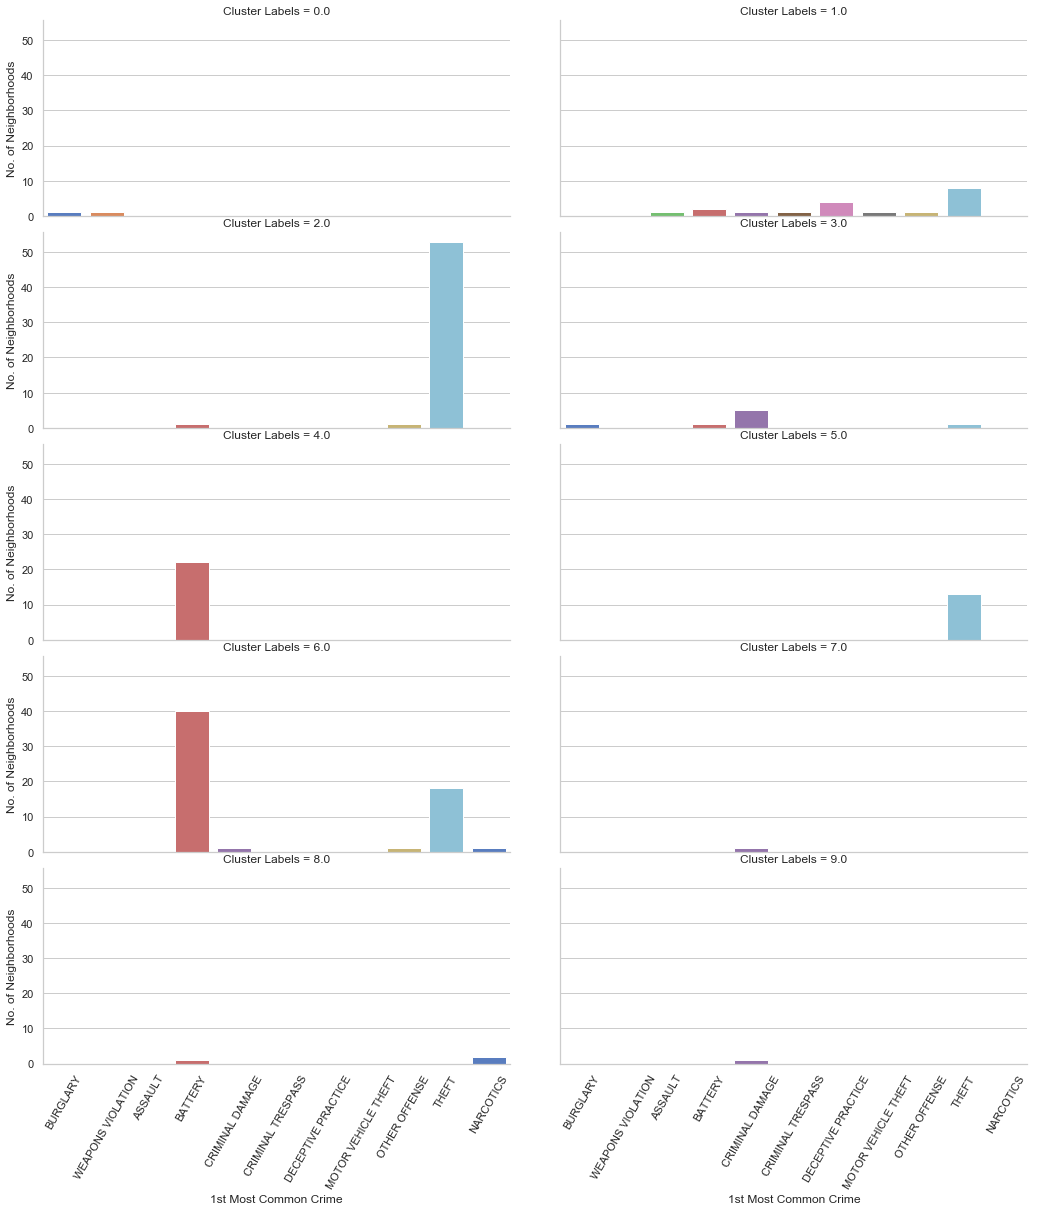

In [294]:
import seaborn as sns
sns.set(style="whitegrid")

# Draw a nested barplot to show number of neighborhood for cluster levels and 1st Most Common Crimes
g = sns.catplot(x="1st Most Common Crime", y="No. of Neighborhoods", col="Cluster Labels", col_wrap=2, data=df_group,
                height=6, kind="bar", palette="muted")
g.fig.set_size_inches(15,15)
g.set_xticklabels(rotation=60)

In [320]:
chicago_merged[['Cluster Labels','Neighborhood']].groupby(['Cluster Labels']).count()

,Neighborhood
Cluster Labels,
0.0,2
1.0,19
2.0,55
3.0,8
4.0,22
5.0,13
6.0,61
7.0,1
8.0,3


# Discussion

The results of the K-nearest neighborhood for crime reports in Chicago area shows some interesting facts about crime. 
- July is the month when there are most crimes, followed by August. 
- There is not much difference in days of week distribution for crimes.
- First of all there are diveres distribution of crime rates in the neighborhood. For example, cluster#2 has around 53 neighborhoods that has Theft pretty common, on the other hand cluster#6 has battery and cluster#3 has significant Criminal damages. The data can help law enforcement agency concentrate of particualr strategy to consider depending on the pattern of crimes.
- Cluster #6 has the highest neighborhood where Battery is predominant, followed by Theft. 


# Conclusion

The study shows an application of web scraping, geo-coding and unsupervised machine learning technique (i.e. K-nearest neighborhood analysis) to analyze and cluster residential neighborhood in terms of types and extensity of crimes. The results can help a home buyer or renter choosing a safer neighborhood or cluster. It can also help law enforcement agencies consider strategic planning to mitigate the crimes.